In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import random

import warnings
warnings.filterwarnings("ignore")

## Baseline

In [4]:
train = pd.read_csv('./data/train/train.csv')

In [5]:
submission = pd.read_csv('./data/sample_submission.csv')

In [6]:
# data를 넣어주면 
def preprocess_data(data, is_train=True):
    
    temp = data.copy()
    temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']] # day, minute, 

    if is_train==True:          
    
        temp['Target1'] = temp['TARGET'].shift(-48).fillna(method='ffill')   # 뒤에서 48개의 값을 지우고 가장 마지막 값으로 채운다
        temp['Target2'] = temp['TARGET'].shift(-48*2).fillna(method='ffill') # 뒤에서 96개의 값을 지우고 가장 마지막 값으로 채운다
        temp = temp.dropna()  # 결측치 제거
        
        return temp.iloc[:-96] # 아 이건 예측값이 0이 되버리니까 제거해버리는구나 ㅇㅋㅇㅋ

    elif is_train==False:
        
        temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]
                              
        return temp.iloc[-48:, :]
df_train = preprocess_data(train)

# RH(상대 습도)

In [7]:
def RH_2(df_train):
    df_train['new_RH']=0
    # RH가 ~20 사이, 20~40 사이, 40~60, 60~80, ~100
    df_train.loc[df_train['RH']<30,'new_RH'] = 0
    df_train.loc[(30<=df_train['RH']) & (df_train['RH']<60),'new_RH'] = 1
    df_train.loc[60<=df_train['RH'],'new_RH'] = 2
    return df_train

# WS(풍속)

In [10]:
def WS_2(df_train):
    df_train['new_WS']=0
    df_train.loc[df_train['WS']<2,'new_RH'] = 0
    df_train.loc[(2<=df_train['WS']) & (df_train['WS']<3),'new_WS'] = 1
    df_train.loc[(3<=df_train['WS']) & (df_train['WS']<5),'new_WS'] = 2
    df_train.loc[5<=df_train['WS'],'new_WS'] = 3
    return df_train

# DNI, DHI를 계산해서 GHI 계산

In [11]:
def cal_ghi(df):
    df['GHI']=0
    lst = list(df.columns)
    idx_hour = lst.index('Hour')
    idx_dhi = lst.index('DHI')
    idx_dni = lst.index('DNI')
    idx_ghi = lst.index('GHI')
    for i in range(len(df)):
        hour = df.iloc[i,idx_hour]
        if 8 <= hour <= 16:
            degree = (hour-7) * np.pi/18
            GHI = df.iloc[i,idx_dni] + df.iloc[i,idx_dhi]*(np.cos(90-degree))  # DHI +DNI*cos(Θ)
            if GHI<0:
                GHI=0
            df.iloc[i,idx_ghi] = GHI
    return df

# Temperature

2    10596
4     8130
3     7947
5     7546
1     6050
6     4622
7     3617
0     2868
8     1088
Name: temper_group, dtype: int64

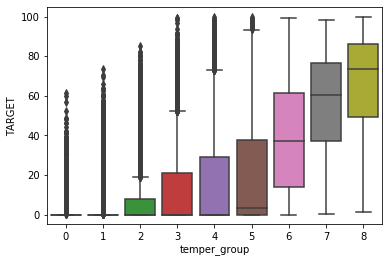

In [27]:
def temperature(temp_target):
    temp_target['temper_group']=0
    temp_target.loc[temp_target['T']<-5,'temper_group'] = 0
    temp_target.loc[(-5 <= temp_target['T']) &(temp_target['T'] < 0),'temper_group'] = 1
    temp_target.loc[(0 <= temp_target['T']) &(temp_target['T'] < 5),'temper_group'] = 2
    temp_target.loc[(5 <= temp_target['T']) &(temp_target['T'] < 10),'temper_group'] = 3
    temp_target.loc[(10<= temp_target['T']) &(temp_target['T'] < 15),'temper_group'] = 4
    temp_target.loc[(15<= temp_target['T']) &(temp_target['T'] < 20),'temper_group'] = 5
    temp_target.loc[(20<= temp_target['T']) &(temp_target['T'] < 25),'temper_group'] = 6
    temp_target.loc[(25<= temp_target['T']) &(temp_target['T'] < 30),'temper_group'] = 7
    temp_target.loc[30 <= temp_target['T'],'temper_group'] = 8
    return temp_target
sns.boxplot(x='temper_group',y='TARGET',data=temperature(df_train))
temperature(df_train)['temper_group'].value_counts()

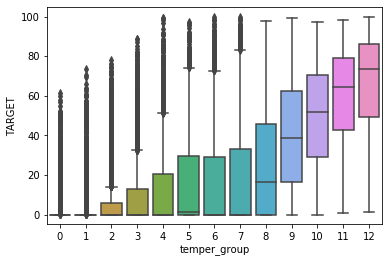

In [28]:
def temperature(temp_target):
    temp_target['temper_group']=0
    temp_target.loc[temp_target['T']<-6,'temper_group'] = 0
    temp_target.loc[(-3 <= temp_target['T']) &(temp_target['T'] < 0),'temper_group'] = 1
    temp_target.loc[(0 <= temp_target['T']) &(temp_target['T'] < 3),'temper_group'] = 2
    temp_target.loc[(3 <= temp_target['T']) &(temp_target['T'] < 6),'temper_group'] = 3
    temp_target.loc[(6<= temp_target['T']) &(temp_target['T'] < 9),'temper_group'] = 4
    temp_target.loc[(9<= temp_target['T']) &(temp_target['T'] < 12),'temper_group'] = 5
    temp_target.loc[(12<= temp_target['T']) &(temp_target['T'] < 15),'temper_group'] = 6
    temp_target.loc[(15<= temp_target['T']) &(temp_target['T'] < 18),'temper_group'] = 7
    temp_target.loc[(18<= temp_target['T']) &(temp_target['T'] < 21),'temper_group'] = 8
    temp_target.loc[(21<= temp_target['T']) &(temp_target['T'] < 24),'temper_group'] = 9
    temp_target.loc[(24<= temp_target['T']) &(temp_target['T'] < 27),'temper_group'] = 10
    temp_target.loc[(27<= temp_target['T']) &(temp_target['T'] < 30),'temper_group'] = 11  
    temp_target.loc[30 <= temp_target['T'],'temper_group'] = 12
    return temp_target
sns.boxplot(x='temper_group',y='TARGET',data=temperature(df_train))

In [ ]:
temperature(df_train)

1은 수가 너무 적은데
5,6,7은 같은 것 같다

In [24]:
temperature(df_train)['temper_group'].value_counts()

2     7092
0     5717
3     5223
6     5186
7     5038
4     4778
5     4394
1     4289
8     3544
9     2791
10    2449
11    1963
Name: temper_group, dtype: int64

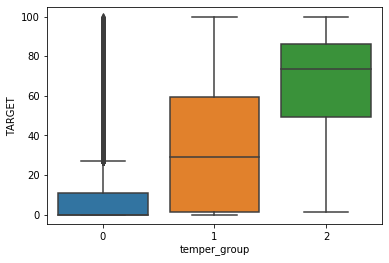

In [29]:
def temperature(temp_target):
    temp_target['temper_group']=0
    temp_target.loc[temp_target['T']<15,'temper_group'] = 0
    temp_target.loc[(15<= temp_target['T']) &(temp_target['T'] < 30),'temper_group'] = 1
    temp_target.loc[30 <= temp_target['T'],'temper_group'] = 2
    return temp_target
sns.boxplot(x='temper_group',y='TARGET',data=temperature(df_train))

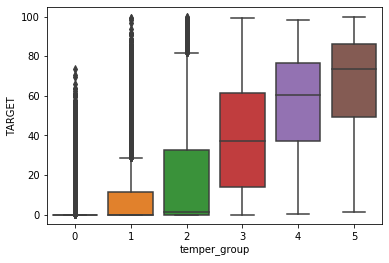

In [33]:
def temperature(temp_target):
    temp_target.loc[temp_target['T']<0,'temper_group'] = 0
    temp_target.loc[(0<= temp_target['T']) &(temp_target['T'] < 9),'temper_group'] = 1
    temp_target.loc[(9<= temp_target['T']) &(temp_target['T'] < 20),'temper_group'] = 2
    temp_target.loc[(20<= temp_target['T']) &(temp_target['T'] < 25),'temper_group'] = 3
    temp_target.loc[(25<= temp_target['T']) &(temp_target['T'] < 30),'temper_group'] = 4
    temp_target.loc[30 <= temp_target['T'],'temper_group'] = 5
    return temp_target
sns.boxplot(x='temper_group',y='TARGET',data=temperature(df_train))

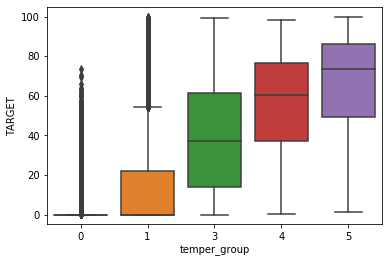

In [35]:
def temperature(temp_target):
    temp_target.loc[temp_target['T']<0,'temper_group'] = 0
    temp_target.loc[(0<= temp_target['T']) &(temp_target['T'] < 20),'temper_group'] = 1
    temp_target.loc[(20<= temp_target['T']) &(temp_target['T'] < 25),'temper_group'] = 3
    temp_target.loc[(25<= temp_target['T']) &(temp_target['T'] < 30),'temper_group'] = 4
    temp_target.loc[30 <= temp_target['T'],'temper_group'] = 5
    return temp_target
sns.boxplot(x='temper_group',y='TARGET',data=temperature(df_train))

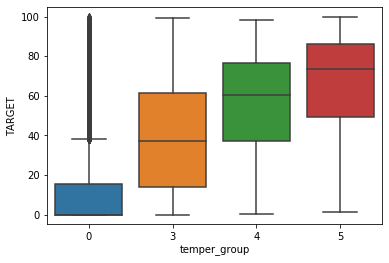

In [40]:
def temperature(temp_target):
    temp_target.loc[temp_target['T']<0,'temper_group'] = 0
    temp_target.loc[(0<= temp_target['T']) &(temp_target['T'] < 20),'temper_group'] = 0
    temp_target.loc[(20<= temp_target['T']) &(temp_target['T'] < 25),'temper_group'] = 3
    temp_target.loc[(25<= temp_target['T']) &(temp_target['T'] < 30),'temper_group'] = 4
    temp_target.loc[30 <= temp_target['T'],'temper_group'] = 5
    return temp_target
sns.boxplot(x='temper_group',y='TARGET',data=temperature(df_train))

# 온도 20 미만인 애들만 따로

In [42]:
dddd = df_train.loc[df_train['T']<20,:]

온도를 평균 당일 평균 기온 or 최고 기온과의 차이로 해야 될듯

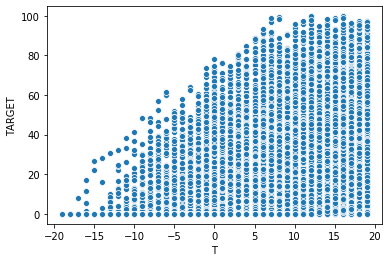

In [46]:
sns.scatterplot(x='T',y='TARGET',data=dddd)

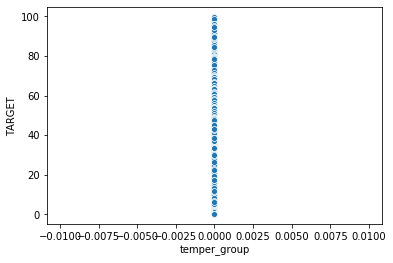

In [41]:
def temperature(temp_target):
    temp_target.loc[temp_target['T']<0,'temper_group'] = 0
    temp_target.loc[(0<= temp_target['T']) &(temp_target['T'] < 20),'temper_group'] = 0
    temp_target.loc[(20<= temp_target['T']) &(temp_target['T'] < 25),'temper_group'] = 3
    temp_target.loc[(25<= temp_target['T']) &(temp_target['T'] < 30),'temper_group'] = 4
    temp_target.loc[30 <= temp_target['T'],'temper_group'] = 5
    return temp_target
sns.scatterplot(x='temper_group',y='TARGET',data=temperature(df_train).loc[df_train['T']<20,:])

In [2]:
df_train

NameError: name 'df_train' is not defined

In [ ]:
def auto_bins(df,col_name,gap=3):
    min_val = df['col_name'].min()
    max_val = df['col_name'].max()
    mean_val = df['col_name'].mean()
    
    
    for i 

In [75]:
df_train = cal_ghi(df_train)
df_train = RH_2(df_train)
df_train = WS_2(df_train)
df_train = temperature(df_train)

In [76]:
# T를 빼보고 싶은데
df_train = df_train[['Hour', 'new_WS', 'temper_group', 'GHI', 'new_RH', 'TARGET', 'Target1', 'Target2']]

In [77]:
df_test = []

for i in range(81):
    file_path = './data/test/' + str(i) + '.csv'
    temp = pd.read_csv(file_path)
    temp = preprocess_data(temp, is_train=False)
    df_test.append(temp)

X_test = pd.concat(df_test)
X_test.shape

(3888, 7)

In [78]:
X_test

,Hour,TARGET,DHI,DNI,WS,RH,T
288,0,0.0,0,0,0.8,80.92,-2.8
289,0,0.0,0,0,0.9,81.53,-2.9
290,1,0.0,0,0,1.0,79.91,-3.0
291,1,0.0,0,0,0.9,79.91,-3.0
292,2,0.0,0,0,0.9,77.20,-3.0
...,...,...,...,...,...,...,...
331,21,0.0,0,0,0.8,63.35,13.7
332,22,0.0,0,0,0.7,64.82,13.1
333,22,0.0,0,0,0.7,66.10,12.8
334,23,0.0,0,0,0.6,67.64,12.4


In [79]:
X_test['GHI']=0
for i in range(len(X_test)):
    hour = X_test.iloc[i,0]
    if 8 <= hour <= 16:
        degree = (hour-7) * np.pi/18
        GHI = X_test.iloc[i,3] + X_test.iloc[i,2]*(np.cos(90-degree))  # DHI +DNI*cos(Θ)
        if GHI<0:
            GHI=0
        X_test.iloc[i,7] = GHI

In [80]:
X_test = temperature(X_test)

In [81]:
X_test = WS_2(X_test)
X_test = RH_1(X_test)
X_test = X_test[['Hour', 'new_WS', 'temper_group', 'GHI', 'new_RH', 'TARGET']]
X_test

,Hour,new_WS,temper_group,GHI,new_RH,TARGET
288,0,0,0,0.0,3,0.0
289,0,0,0,0.0,3,0.0
290,1,0,0,0.0,3,0.0
291,1,0,0,0.0,3,0.0
292,2,0,0,0.0,3,0.0
...,...,...,...,...,...,...
331,21,0,2,0.0,3,0.0
332,22,0,2,0.0,3,0.0
333,22,0,2,0.0,3,0.0
334,23,0,2,0.0,3,0.0


In [82]:
print(set(df_train.columns))
print(set(X_test.columns))
print(set(df_train.columns)-set(X_test.columns))

{'TARGET', 'temper_group', 'new_WS', 'Hour', 'Target1', 'GHI', 'Target2', 'new_RH'}
{'TARGET', 'temper_group', 'new_WS', 'Hour', 'GHI', 'new_RH'}
{'Target1', 'Target2'}


In [83]:
from sklearn.model_selection import train_test_split
X_train_1, X_valid_1, Y_train_1, Y_valid_1 = train_test_split(df_train.iloc[:, :-2], df_train.iloc[:, -2], test_size=0.3, random_state=0)
X_train_2, X_valid_2, Y_train_2, Y_valid_2 = train_test_split(df_train.iloc[:, :-2], df_train.iloc[:, -1], test_size=0.3, random_state=0)

In [84]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [85]:
from lightgbm import LGBMRegressor

# Get the model and the predictions in (a) - (b)
def LGBM(q, X_train, Y_train, X_valid, Y_valid, X_test):
    
    # (a) Modeling  
    model = LGBMRegressor(objective='quantile', alpha=q,
                         n_estimators=10000, bagging_fraction=0.7, learning_rate=0.027, subsample=0.7)                   
                         
                         
    model.fit(X_train, Y_train, eval_metric = ['quantile'], 
          eval_set=[(X_valid, Y_valid)], early_stopping_rounds=300, verbose=500)

    # (b) Predictions
    pred = pd.Series(model.predict(X_test).round(2))
    return pred, model

In [86]:
# Target 예측

def train_data(X_train, Y_train, X_valid, Y_valid, X_test):

    LGBM_models=[]
    LGBM_actual_pred = pd.DataFrame()

    for q in quantiles:
        print(q)
        pred , model = LGBM(q, X_train, Y_train, X_valid, Y_valid, X_test)
        LGBM_models.append(model)
        LGBM_actual_pred = pd.concat([LGBM_actual_pred,pred],axis=1)

    LGBM_actual_pred.columns=quantiles
    
    return LGBM_models, LGBM_actual_pred

In [87]:
# Target1
models_1, results_1 = train_data(X_train_1, Y_train_1, X_valid_1, Y_valid_1, X_test)
results_1.sort_index()[:48]

0.1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.7 will be ignored. Current value: bagging_fraction=0.7
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[128]	valid_0's quantile: 1.39437
0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.7 will be ignored. Current value: bagging_fraction=0.7
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 2.24021
Early stopping, best iteration is:
[397]	valid_0's quantile: 2.23987
0.3
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.7 will be ignored. Current value: bagging_fraction=0.7
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 2.66799
Early stopping, best iteration is:
[526]	valid_0's quantile: 2.66768
0.4
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.7 will be ignored. Current value: bagging_fraction=0.7
Training until validation scores don't improve for 300 

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [88]:
# Target2
models_2, results_2 = train_data(X_train_2, Y_train_2, X_valid_2, Y_valid_2, X_test)
results_2.sort_index()[:48]

0.1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.7 will be ignored. Current value: bagging_fraction=0.7
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 1.40395
Early stopping, best iteration is:
[319]	valid_0's quantile: 1.40142
0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.7 will be ignored. Current value: bagging_fraction=0.7
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 2.25567
Early stopping, best iteration is:
[564]	valid_0's quantile: 2.25439
0.3
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.7 will be ignored. Current value: bagging_fraction=0.7
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 2.69981
[1000]	valid_0's quantile: 2.70031
Early stopping, best iteration is:
[778]	valid_0's quantile: 2.6987
0.4
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.7 will be ignored. Current value: bagging_

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [89]:
submission.loc[submission.id.str.contains("Day7"), "q_0.1":] = results_1.sort_index().values
submission.loc[submission.id.str.contains("Day8"), "q_0.1":] = results_2.sort_index().values
submission

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.csv_Day7_0h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.csv_Day7_1h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.csv_Day7_1h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.csv_Day7_2h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7771,80.csv_Day8_21h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7772,80.csv_Day8_22h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,80.csv_Day8_22h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,80.csv_Day8_23h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
submission.to_csv('./data/ws2,rh2,t_group.csv', index=False)